In [92]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.2)
import pandas as pd
import warnings
import sys
import statsmodels.stats.multicomp as mc

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from lapvelocity import GetData as gd

In [162]:
ExperimentFolder = '/Users/seetha/Box Sync/MultiDayData/Data/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/Figure1/'

TaskDict = {'Task3': '1 Fam Rew',
            'Task4': '2 Fam Rew'}

In [163]:
A = gd(ExperimentFolder, TaskDict=['Task1', 'Task2'])

Loading.. NR34
Loading.. CFC17
Loading.. NR32
Loading.. CFC16
Loading.. CFC18


In [164]:
B = gd(ExperimentFolder, TaskDict=['Task3', 'Task4'])

Loading.. NR34
Loading.. CFC17
Loading.. NR32
Loading.. CFC16
Loading.. CFC18


In [171]:
df1 = pd.DataFrame(A.laptime.T, columns = ['Prev','Next_first','Next_second'])
df1['Task'] = 'Task1'
# df1 = df1.melt()
df2 = pd.DataFrame(B.laptime.T, columns = ['Prev','Next_first','Next_second'])
df2['Task'] = 'Task3'
# df2 = df2.melt()

df = pd.concat((df1, df2))
df = df.melt(id_vars=['Task'])
comp1 = mc.MultiComparison(df['value'], df['variable'])
tbl, a1, a2 = comp1.allpairtest(scipy.stats.ttest_rel, method= "bonf")
tbl

group1,group2,stat,pval,pval_corr,reject
Next_first,Next_second,0.9945,0.346,1.0,False
Next_first,Prev,0.1913,0.8525,1.0,False
Next_second,Prev,-2.0056,0.0759,0.2276,False


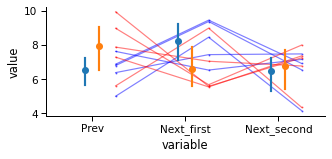

In [186]:
fs, ax = plt.subplots(1)
for n, i in enumerate(A.laptime.T):
    ax.plot([0.25, 1.25, 2.25], i, 'b.-', markersize=2, alpha=0.5)
for n, i in enumerate(B.laptime.T):
    ax.plot([0.25, 1.25, 2.25], i, 'r.-', markersize=2, alpha=0.5)
sns.pointplot(data=df, x='variable', y='value', hue='Task', dodge=0.15, linestyle="none", legend=False)
sns.despine(fs)
fs.set_size_inches((5, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Lapwise_velocity.pdf'), bbox_inches='tight')